MSE:  0.04564377620869025
RMSE:  0.2136440408920648


C:\Users\ahsani2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


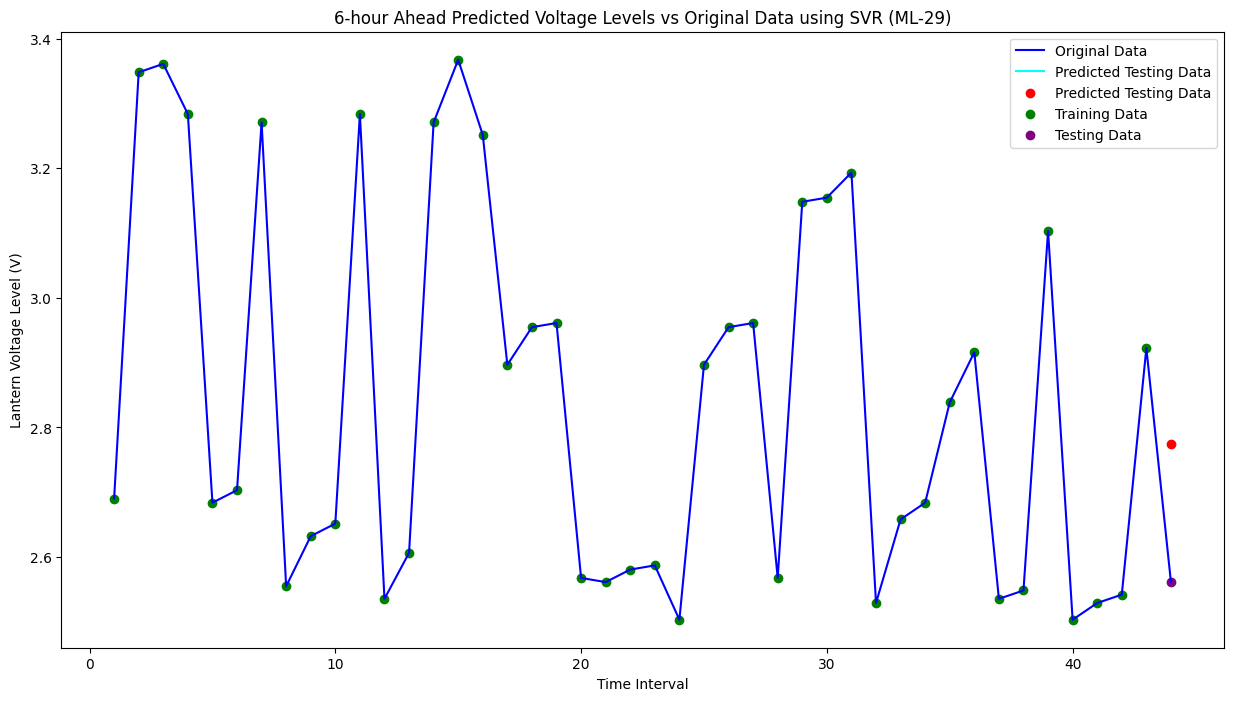

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error
import math

# Function to load dataset from Excel file into numpy arrays
def load_dataset(filename):
    data = pd.read_excel(filename)  # Assuming the Excel file has two columns
    X = data.iloc[:, 0].values.reshape(-1, 1)  # Assuming first column is time intervals
    y = data.iloc[:, 1].values.reshape(-1, 1)  # Assuming second column is voltage levels
    return X, y

# Loading dataset
time_intervals, voltage_levels = load_dataset(r'C:\Users\ahsani2\Documents\03- AI part\QuarterSpaced_ML29.xlsx')

# Normalize the voltage levels data
scaler = MinMaxScaler()
voltage_levels_scaled = scaler.fit_transform(voltage_levels)

# Splitting the data into training and testing sets
X_train = time_intervals[:43]
X_test = time_intervals[43:]
y_train_scaled = voltage_levels_scaled[:43]
y_test_scaled = voltage_levels_scaled[43:]

# Creating and fitting the model
nsvr = NuSVR()
model = nsvr.fit(X_train, y_train_scaled)

# Predicting the voltage levels for testing data
ypred_scaled = nsvr.predict(X_test)

# Inverse transforming the scaled voltage levels to their original forms
y_train = scaler.inverse_transform(y_train_scaled)
y_test = scaler.inverse_transform(y_test_scaled)
ypred = scaler.inverse_transform(ypred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", math.sqrt(mse))

# Plotting the predicted values along with the original data
plt.figure(figsize=(15, 8))

# Plotting the original data
plt.plot(time_intervals, voltage_levels, color='blue', label='Original Data')

# Plotting the predicted values for testing data
plt.plot(X_test, ypred, color='cyan', label='Predicted Testing Data')
plt.scatter(X_test, ypred, color='red', label='Predicted Testing Data')

# Highlighting the training and testing data points
plt.scatter(X_train, y_train, color='green', label='Training Data')
plt.scatter(X_test, y_test, color='purple', label='Testing Data')

plt.xlabel('Time Interval')
plt.ylabel('Lantern Voltage Level (V)')
plt.title('6-hour Ahead Predicted Voltage Levels vs Original Data using SVR (ML-29)')
plt.legend()
plt.show()
